In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE


In [ ]:
data = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")

In [ ]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
EF = data['ejection_fraction'].values
EF

array([20, 38, 20, 20, 20, 40, 15, 60, 65, 35, 38, 25, 30, 38, 30, 50, 38,
       14, 25, 55, 25, 30, 35, 60, 30, 38, 40, 45, 38, 30, 38, 45, 35, 30,
       50, 35, 50, 50, 30, 38, 20, 30, 45, 50, 60, 38, 25, 38, 20, 30, 25,
       20, 62, 50, 38, 30, 35, 40, 20, 20, 25, 40, 35, 35, 80, 20, 15, 25,
       25, 25, 40, 35, 35, 50, 20, 20, 60, 40, 38, 45, 40, 50, 25, 50, 25,
       50, 35, 60, 40, 25, 45, 45, 60, 25, 38, 60, 25, 60, 25, 40, 25, 45,
       25, 30, 50, 30, 45, 35, 38, 35, 60, 35, 25, 60, 40, 40, 60, 60, 60,
       38, 60, 38, 38, 30, 40, 50, 17, 60, 30, 35, 60, 45, 40, 60, 35, 40,
       60, 25, 35, 30, 38, 35, 30, 40, 25, 30, 30, 60, 30, 35, 45, 60, 45,
       35, 35, 25, 35, 25, 50, 45, 40, 35, 40, 35, 30, 38, 60, 20, 40, 35,
       35, 40, 60, 20, 35, 60, 40, 50, 60, 40, 30, 25, 25, 38, 25, 30, 50,
       25, 40, 45, 35, 60, 40, 30, 20, 45, 38, 30, 20, 35, 45, 60, 60, 25,
       40, 45, 40, 38, 40, 35, 17, 62, 50, 30, 35, 35, 50, 70, 35, 35, 20,
       50, 35, 25, 25, 60

In [ ]:
data['encoded_EF'] = np.where(data['ejection_fraction'] < 50, 0, 1)
data.drop(columns=['ejection_fraction'], inplace=True)

data.head()


,age,anaemia,creatinine_phosphokinase,diabetes,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,encoded_EF
0,75.0,0,582,0,1,265000.00,1.9,130,1,0,4,1,0
1,55.0,0,7861,0,0,263358.03,1.1,136,1,0,6,1,0
2,65.0,0,146,0,0,162000.00,1.3,129,1,1,7,1,0
3,50.0,1,111,0,0,210000.00,1.9,137,1,0,7,1,0
4,65.0,1,160,1,0,327000.00,2.7,116,0,0,8,1,0


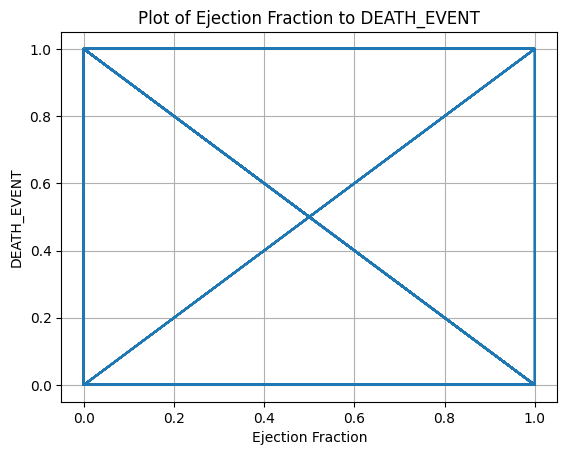

In [16]:
# Investigation corr. between ejection_fraction and death

# Plotting
plt.plot(data['encoded_EF'], data['DEATH_EVENT'])  # 'o' for scatter plot, you can change it to '-' for line plot
plt.xlabel('Ejection Fraction')
plt.ylabel('DEATH_EVENT')
plt.title('Plot of Ejection Fraction to DEATH_EVENT')
plt.grid(True)
plt.show()

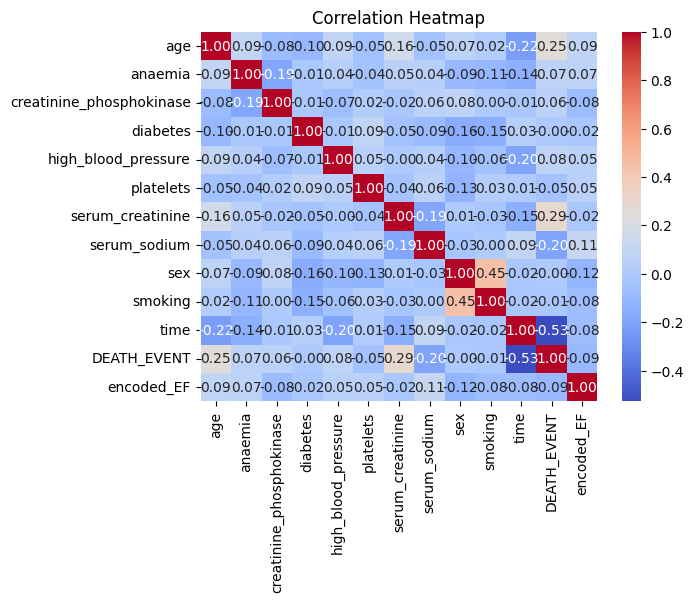

In [17]:
import seaborn as sns


# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [18]:
data.shape

(299, 13)

In [19]:
column_names = list(data.columns)

print(column_names)

['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT', 'encoded_EF']


In [20]:
X = data.drop(['sex', 'time', 'DEATH_EVENT', 'encoded_EF'], axis=1)


In [28]:

y = data['encoded_EF']
y.describe()

count    299.000000
mean       0.200669
std        0.401172
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: encoded_EF, dtype: float64

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weights manually
total_samples = len(y_train)
class_counts = np.bincount(y_train)
class_weights = {i: total_samples / (len(class_counts) * class_counts[i]) for i in range(len(class_counts))}
class_weights

{0: 0.6223958333333334, 1: 2.5425531914893615}

### **TENSORFLOW**

In [38]:
# Define custom loss function with class weights
def weighted_binary_crossentropy(y_true, y_pred):
    # Cast y_true to float32 to match the data type of y_pred
    y_true = tf.cast(y_true, tf.float32)

    # Clip predicted values to prevent log(0) and log(1) issues
    y_pred = tf.clip_by_value(y_pred, 1e-7, 1 - 1e-7)

    # Calculate weighted binary crossentropy
    loss = -(class_weights[0] * y_true * tf.math.log(y_pred) + class_weights[1] * (1 - y_true) * tf.math.log(1 - y_pred))
    return tf.reduce_mean(loss)


# Define and compile your model with custom loss function
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [40]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss=weighted_binary_crossentropy, metrics=['accuracy'])

# Train the model
print("Training...")
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model
print("Evaluating...")
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Training...
Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 1.9728 - accuracy: 0.8033
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 1.9728 - accuracy: 0.8033
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 1.9728 - accuracy: 0.8033
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 1.9728 - accuracy: 0.8033
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 1.9728 - accuracy: 0.8033
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 1.9728 - accuracy: 0.8033
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 1.9728 - accuracy: 0.8033
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 1.9728 - accuracy: 0.8033
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 1.9728 - accuracy: 0.8033
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 1.9728 - accuracy: 0.8033
Epoch 11/100
8/8 

### **RANDOM FOREST**

In [42]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Random Forest Classifier
print("Random Forest Classifier:")
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Accuracy:", rf_accuracy)
print("Classification Report:")
print(classification_report(y_test, rf_predictions))


Random Forest Classifier:
Accuracy: 0.8
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88        47
           1       0.56      0.38      0.45        13

    accuracy                           0.80        60
   macro avg       0.70      0.65      0.67        60
weighted avg       0.78      0.80      0.79        60



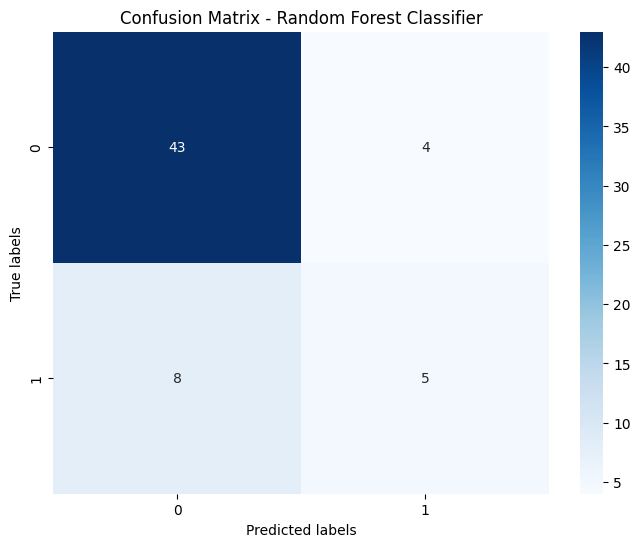

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, rf_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()
